In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tqdm import tqdm
import matplotlib.pyplot as plt

from collections import OrderedDict

In [2]:
iris = load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### クラスにするわ

In [3]:
class Linear:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x[None,:].T, dout[None,:])
        self.db = dout
        return dx
        
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):

        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1 - self.out) * self.out
        return dx

In [4]:
class TwoLayerIris:
    def __init__(self, input_size, hidden_size, output_size):
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.random.randn(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.random.randn(output_size)
        
        self.layers = OrderedDict()
        self.layers['Linear1'] = Linear(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Linear2'] = Linear(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid2'] = Sigmoid()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        if type(t) != np.ndarray or type(t) != list:
            t = np.eye(3)[t]
        y = self.predict(x)
        return 1/2 * np.sum((y - t) ** 2)
    
    
    def accuracy(self, x, t):
        pass
    
    def gradient(self, x, t):
        #backward
        if type(t) != np.ndarray or type(t) != list:
            t = np.eye(3)[t]
        dout = self.predict(x) - t
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        grads['W1'] = self.layers['Linear1'].dW
        grads['b1'] = self.layers['Linear1'].db
        grads['W2'] = self.layers['Linear2'].dW
        grads['b2'] = self.layers['Linear2'].db
        
        return grads

In [5]:
network = TwoLayerIris(input_size=4, hidden_size=4, output_size=3)
iters_num = 10000
learning_rate = 0.01
train_loss_list = []
train_accu_list = []
test_loss_list = []
test_accu_list = []
for x in tqdm(range(iters_num)):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.6)
    for i,data in enumerate(X_train):
        grad = network.gradient(data, y_train[i])
        for key in ['W1', 'b1', 'W2', 'b2']:
            network.params[key] -= learning_rate * grad[key]
    train_loss_list.append(network.loss(X_train, y_train))
    
    result_train = np.argmax(network.predict(X_train), axis = 1)
    train_accu_list.append(np.sum(result_train == y_train)/y_train.size)
    
    test_loss_list.append(network.loss(X_test, y_test))
    
    result_test = np.argmax(network.predict(X_test), axis = 1)
    test_accu_list.append(np.sum(result_test == y_test)/y_test.size)
    

100%|██████████| 10000/10000 [00:27<00:00, 367.87it/s]


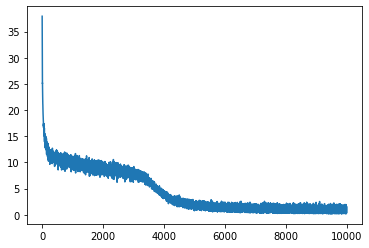

In [6]:
plt.plot(train_loss_list)

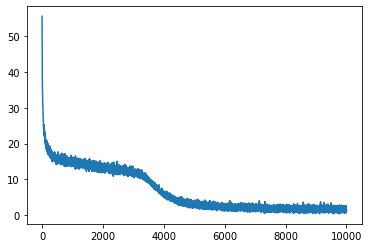

In [7]:
plt.plot(test_loss_list)

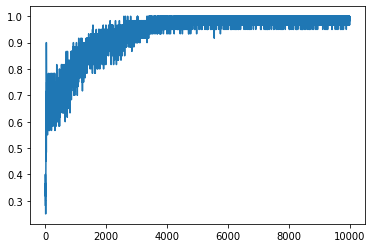

In [8]:
plt.plot(train_accu_list)


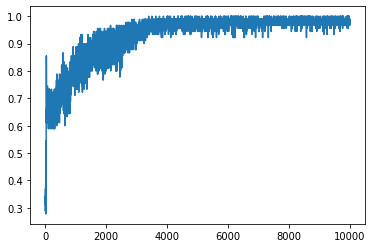

In [9]:
plt.plot(test_accu_list)